In [6]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')
print('train data:' + str(train.shape))
print('test data:' + str(test.shape))
train_ds = train.drop('label', axis=1).values
test_ds = test.values
labels = train.label.to_numpy()

train data:(42000, 785)
test data:(28000, 784)


1


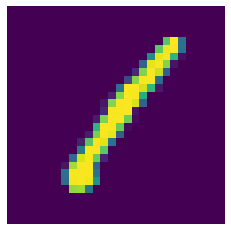

In [4]:
plt.imshow(train_ds[0:1].reshape(28,28))
plt.axis('off')
print(labels[0])

In [9]:
train_tensor = torch.tensor(train_ds)
test_tensor = torch.tensor(test_ds)
labels_tensor = torch.tensor(labels)

In [10]:
train_dataset = TensorDataset(train_tensor, labels_tensor)
print(train_dataset[0:2])

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([1., 0.]))


In [16]:
train_ds , val_ds = random_split(train_dataset,(32000,10000))
print(train_ds.dataset, val_ds)

<torch.utils.data.dataset.TensorDataset object at 0x7f6321b5e9a0> <torch.utils.data.dataset.Subset object at 0x7f6321c39820>


In [ ]:
batch_size = 100
learning_rate = 0.01

train_loader = DataLoader(
    train_ds,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

val_loader = DataLoader(
    val_ds,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)